In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Flight Price Prediction

/content/drive/My Drive/Flight Price Prediction


In [4]:
ls

Data_Train.xlsx  Sample_submission.xlsx  Test_set.xlsx  Untitled0.ipynb


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
train_data=pd.read_excel('/content/drive/My Drive/Flight Price Prediction/Data_Train.xlsx')

In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
train_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
train_data.shape

(10682, 11)

In [15]:
train_data.drop('Additional_Info',inplace=True,axis=1)

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


In [19]:
train_data['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → BBI → HYD                   1
BOM → CCU → HYD                   1
CCU → IXA → BLR                   1
BOM → JDH → JAI → DEL → HYD       1
BLR → HBX → BOM → AMD → DEL       1
Name: Route, Length: 128, dtype: int64

In [21]:
train_data.drop('Route',inplace=True,axis=1)

In [22]:
train_data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


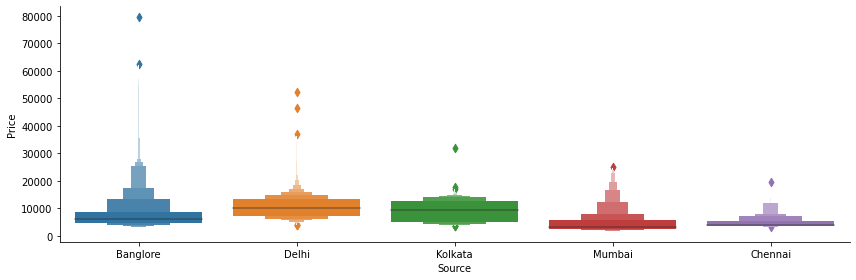

In [28]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


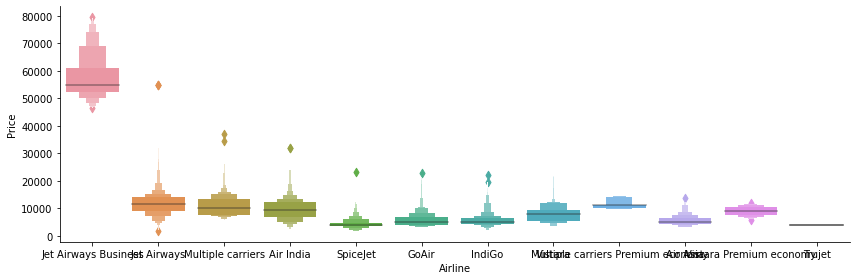

In [29]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [30]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [33]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
airline=train_data['Airline']
airline_hot=pd.get_dummies(airline,drop_first=True)
airline_hot.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [40]:
source=train_data['Source']
source_hot=pd.get_dummies(source,prefix='source')
source_hot.head()

,source_Banglore,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [43]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [44]:
destination=train_data['Destination']
destination_hot=pd.get_dummies(destination,prefix='destination')
destination_hot.head()

,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [48]:
train_data['journey_day']=pd.to_datetime(train_data['Date_of_Journey']).dt.day

In [49]:
train_data['journey_month']=pd.to_datetime(train_data['Date_of_Journey']).dt.month

In [50]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_date,journey_month,journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,2019-03-24,3,24
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,2019-01-05,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,2019-09-06,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,2019-12-05,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,2019-01-03,1,3


In [ ]:
train_data.drop('Date_of_Journey',inplace=True,axis=1)

In [53]:
train_data.drop('journey_date',inplace=True,axis=1)

In [54]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_month,journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [55]:
train_data.drop('Airline',inplace=True,axis=1)

In [56]:
train_data.drop('Source',inplace=True,axis=1)

In [57]:
train_data.drop('Destination',inplace=True,axis=1)

In [58]:
dep_time=train_data['Dep_Time']
train_data['dep_hour']=pd.to_datetime(dep_time).dt.hour
train_data['dep_minute']=pd.to_datetime(dep_time).dt.minute

In [59]:
train_data.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute
0,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20
1,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50
2,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5
4,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50


In [60]:
train_data.drop('Dep_Time',axis=1,inplace=True)

In [61]:
arr_time=train_data['Arrival_Time']
train_data['arr_hour']=pd.to_datetime(arr_time).dt.hour
train_data['arr_minute']=pd.to_datetime(arr_time).dt.minute

In [62]:
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [63]:
train_data.head()

,Duration,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arr_hour,arr_minute
0,2h 50m,non-stop,3897,3,24,22,20,1,10
1,7h 25m,2 stops,7662,1,5,5,50,13,15
2,19h,2 stops,13882,9,6,9,25,4,25
3,5h 25m,1 stop,6218,12,5,18,5,23,30
4,4h 45m,1 stop,13302,1,3,16,50,21,35


In [64]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [65]:
stops={'Total_Stops':{
    '1 stop':1,
    'non-stop':0,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
}}

In [69]:
train_data.replace(stops,inplace=True)

In [70]:
train_data.head()

,Duration,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arr_hour,arr_minute
0,2h 50m,0,3897,3,24,22,20,1,10
1,7h 25m,2,7662,1,5,5,50,13,15
2,19h,2,13882,9,6,9,25,4,25
3,5h 25m,1,6218,12,5,18,5,23,30
4,4h 45m,1,13302,1,3,16,50,21,35


In [71]:
duration=list(train_data['Duration'])
duration_min=[]
for i in range(len(duration)):
  duration_split=duration[i].split(' ')
  if(len(duration_split)==1):
    if 'h' in duration_split[0]:
      duration[i]=duration[i]+' 0m'
    if 'm' in duration_split[0]:
      duration[i]='0h '+duration[i]
    
      

In [74]:
for i in range(len(duration)):
  duration_split=duration[i].split(' ')
  hr=duration_split[0].replace('h','')
  hr=int(hr)
  min=duration_split[1].replace('m','')
  min=int(min)
  duration_min.append(min+(hr*60))

In [75]:
duration_min

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [76]:
train_data['Duration']=duration_min

In [77]:
train_data.head()

,Duration,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arr_hour,arr_minute
0,170,0,3897,3,24,22,20,1,10
1,445,2,7662,1,5,5,50,13,15
2,1140,2,13882,9,6,9,25,4,25
3,325,1,6218,12,5,18,5,23,30
4,285,1,13302,1,3,16,50,21,35


In [82]:
data=pd.concat([train_data,airline_hot,source_hot,destination_hot],axis=1)

In [83]:
data.head()

,Duration,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arr_hour,arr_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,source_Banglore,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,170,0,3897,3,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [84]:
data.columns

Index(['Duration', 'Total_Stops', 'Price', 'journey_month', 'journey_day',
       'dep_hour', 'dep_minute', 'arr_hour', 'arr_minute', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'source_Banglore',
       'source_Chennai', 'source_Delhi', 'source_Kolkata', 'source_Mumbai',
       'destination_Banglore', 'destination_Cochin', 'destination_Delhi',
       'destination_Hyderabad', 'destination_Kolkata',
       'destination_New Delhi'],
      dtype='object')

In [85]:
price=data['Price']
data.drop('Price',axis=1,inplace=True)

In [86]:
data.head()

,Duration,Total_Stops,journey_month,journey_day,dep_hour,dep_minute,arr_hour,arr_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,source_Banglore,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,170,0,3,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1140,2,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,325,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,285,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [87]:
features=data.iloc[:,:]

In [88]:
features

,Duration,Total_Stops,journey_month,journey_day,dep_hour,dep_minute,arr_hour,arr_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,source_Banglore,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,170,0,3,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1140,2,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,325,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,285,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,9,4,19,55,22,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,155,0,4,27,20,45,23,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,180,0,4,27,8,20,11,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,160,0,1,3,11,30,14,10,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [89]:
features=np.array(features)
price=np.array(price)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,price,test_size=0.2,random_state=7)

## Feature Engineering

This is done using Extratreesregressor from sklearn.ensemble

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [92]:
print(selection.feature_importances_)

[1.19747958e-01 2.32156809e-01 8.88377811e-02 1.08307430e-01
 3.05952187e-02 2.71019815e-02 3.27914978e-02 2.57361951e-02
 1.07334849e-02 1.63340813e-03 1.40561099e-02 1.42665636e-01
 6.58469229e-02 2.05251067e-02 8.92221712e-04 2.90736501e-03
 0.00000000e+00 5.60554869e-03 1.40487208e-04 9.49127089e-03
 5.32828314e-04 5.10768604e-03 2.50212181e-03 5.99201208e-03
 2.48416869e-03 5.57250740e-03 1.37339307e-02 6.72319775e-03
 5.50290336e-04 1.70288239e-02]


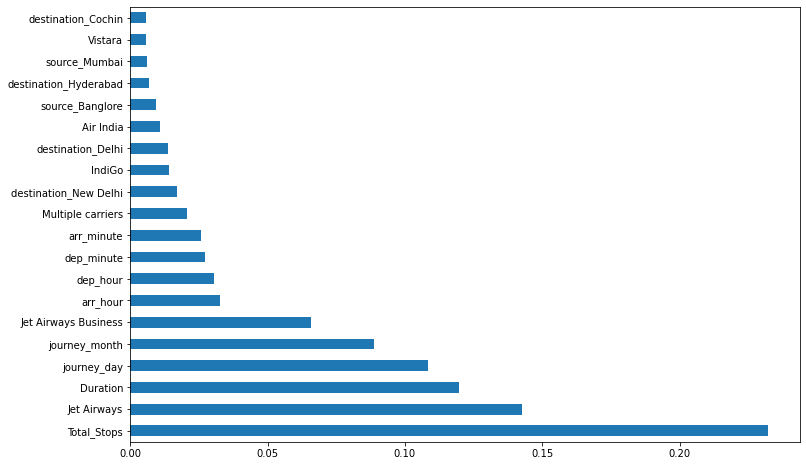

In [103]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=data.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Model Training

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
model=RandomForestRegressor()

In [177]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [178]:
y_pred=model.predict(x_test)

In [179]:
y_pred

array([14223.26283333,  3944.24      , 10468.8025    , ...,
        7071.02      , 13931.86833333, 15160.5       ])

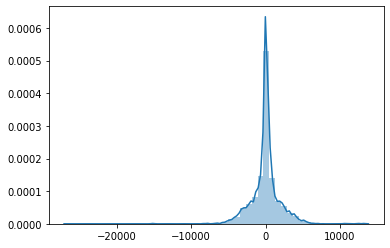

In [180]:
sns.distplot(y_pred-y_test)

In [181]:
model.score(x_train,y_train)

0.951777831573606

In [182]:
model.score(x_test,y_test)

0.8137483280093512

In [183]:
import sklearn.metrics as m

In [184]:
m.mean_absolute_error(y_test,y_pred)

1188.1753137338019

In [185]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

1938.3189909502541

In [186]:
from xgboost import XGBRegressor

In [187]:
xgbooster=XGBRegressor(max_depth=12)

In [188]:
xgbooster.fit(x_train,y_train)

[18:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [189]:
y_pred=xgbooster.predict(x_test)

In [190]:
y_pred

array([14235.586 ,  3970.4255, 10422.824 , ...,  6383.347 , 12639.763 ,
       15226.311 ], dtype=float32)

In [191]:
xgbooster.score(x_train,y_train)

0.9625273148353176

In [192]:
xgbooster.score(x_test,y_test)

0.8047574719974309

In [193]:
import sklearn.metrics as m

In [194]:
m.mean_absolute_error(y_test,y_pred)

1160.662990886026

In [195]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

1984.5514926453282

In [196]:
import pickle
pickle.dump(model,open('model.pkl','wb+'))